기록되는 정보

NUM_ACC_SAMPLES = 1016

NUM_STS_SAMPLES = 512

매직 바이트(24) | diagnostic(116) | dgc_decision(1) | rx_data(TX_ID|Frame_seq|FCS)(8) | ACC(NUM_ACC_SAMPLES * 6 + 1 = 6097) | STS(NUM_STS_SAMPLES * 6 + 1 = 3073)


In [1]:
DW_TIME_UNIT = 1.0/499.2e6/128.0
DIR_NAME1 = "module_1_20240522_105638"

HAS_ACC_SAMPLES = False
HAS_STS_SAMPLES = False

In [3]:
from util import read_record_file

parse_packets = read_record_file(DIR_NAME1, 5, True, True)

IndexError: index out of range

In [57]:
rx_cfos = []
rx_diff_times = []
rx_times = []

for i in range(len(parse_packets)):
    rx_time = parse_packets[i]['diag']['ipatovRxTime']
    rx_times.append(rx_time)
    rx_cfos.append(parse_packets[i]['cfo'])
    
    if i > 0:
        rx_diff_time = rx_time - parse_packets[i-1]['diag']['ipatovRxTime'] 
        if rx_diff_time < 0:
            rx_diff_time += DW_TIME_UNIT * 0xffffffffff
        
        rx_diff_times.append(rx_diff_time)




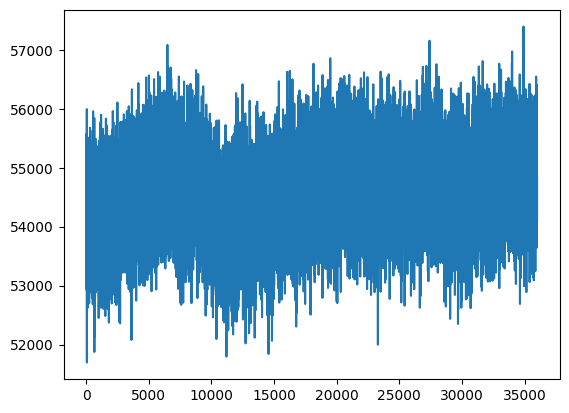

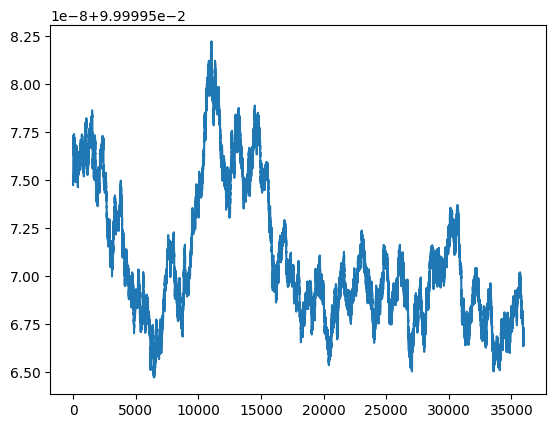

In [58]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(rx_cfos)
plt.figure()
plt.plot(rx_diff_times)

In [114]:
#  if i == len(results[DIR_NAME1]) - 1:
#         break

#     if results[DIR_NAME1][i+1]['diag']['ipatovRxTime']-results[DIR_NAME1][i]['diag']['ipatovRxTime'] < 0:
#         t_diff.append(0xffffffffff *DW_TIME_UNIT + results[DIR_NAME1][i+1]['diag']['ipatovRxTime'] - results[DIR_NAME1][i]['diag']['ipatovRxTime'])
#         t_cfo.append(1 - (0xffffffffff*DW_TIME_UNIT + results[DIR_NAME1][i+1]['diag']['ipatovRxTime']) / results[DIR_NAME1][i]['diag']['ipatovRxTime'])
        
#     else:
#         t_diff.append(results[DIR_NAME1][i+1]['diag']['ipatovRxTime']-results[DIR_NAME1][i]['diag']['ipatovRxTime'])
#         t_cfo.append(results[DIR_NAME1][i+1]['diag']['ipatovRxTime'] - 0.1 / results[DIR_NAME1][i]['diag']['ipatovRxTime'])
    